# Annotation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sktime.annotation.datagen import piecewise_normal_multivariate

np.random.seed(123)

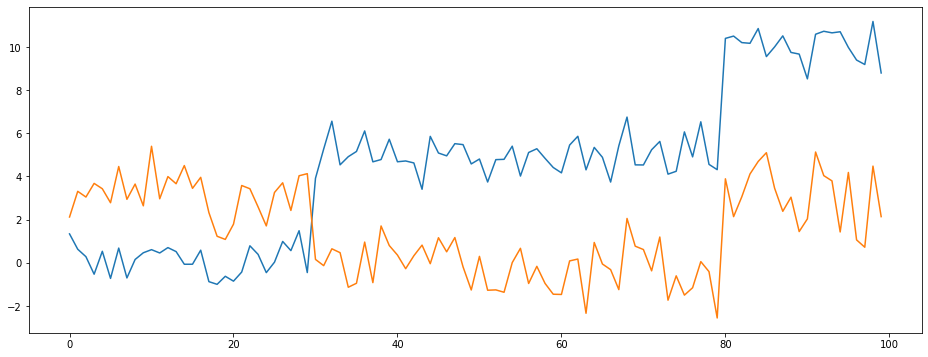

In [2]:
mv_mean = piecewise_normal_multivariate(
    means=[[0, 3], [5, 0], [10, 3]],
    lengths=[30, 50, 20],
    covariances=[
        [[0.5, 0.3], [0.3, 1.0]],
        [[0.5, 0.3], [0.3, 1.0]],
        [[0.5, 0.3], [0.3, 1.0]],
    ],
    random_state=279,
)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(mv_mean);

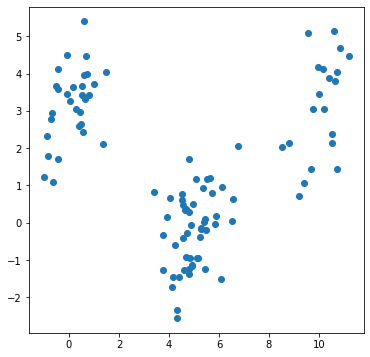

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(mv_mean[:, 0], mv_mean[:, 1], "o");

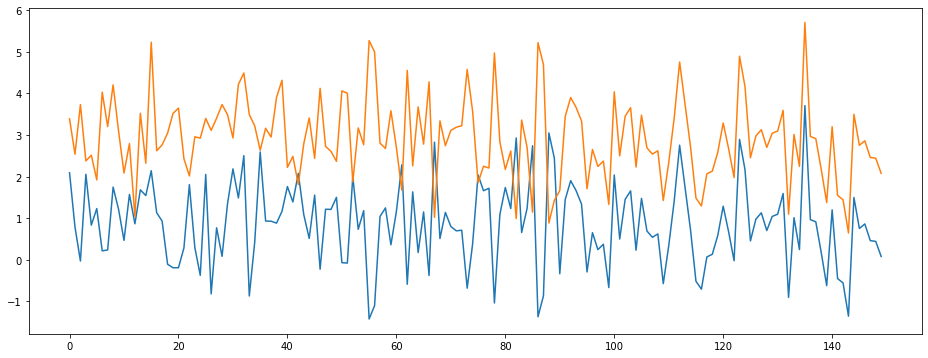

In [4]:
mv_cov = piecewise_normal_multivariate(
    means=[[1.1, 3], [1, 2.9], [1, 3]],
    lengths=[40, 50, 60],
    covariances=[
        [[1.0, 0.003], [0.003, 1.0]],
        [[1.0, -0.999], [-0.999, 1.0]],
        [[1.0, 1.0], [1.0, 1.0]],
    ],
    random_state=2354,
)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(mv_cov);

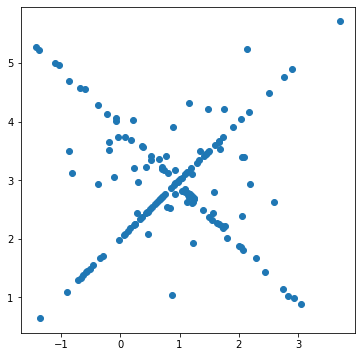

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(mv_cov[:, 0], mv_cov[:, 1], "o")

### HIDALGO: Heterogeneous Intrinsic Dimensionality ALGOrithm

A fundamental paradigm in machine learning is that a small number of variables is often sufficient to describe high-dimensional data, where Intrinsic dimensionality (ID) is the minimum number of variables required. In most approaches for dimensionality reduction and manifold learning, the ID is assumed to be constant in the dataset. However, this assumption is often violated in the case of real-world data. Heterogeneous ID allows for data to be represented by a mixture model on the support on the union of K manifolds with varying dimensions. Points are then assigned to manifold k with corresponding dimensionality. Hidalgo extends this concept to a Bayesian framework which allows the identification (by Gibbs sampling) of regions in the data landscape where the ID can be considered constant. As such, Hidalgo offers robust method for unsupervised segmentation of high-dimensional data.

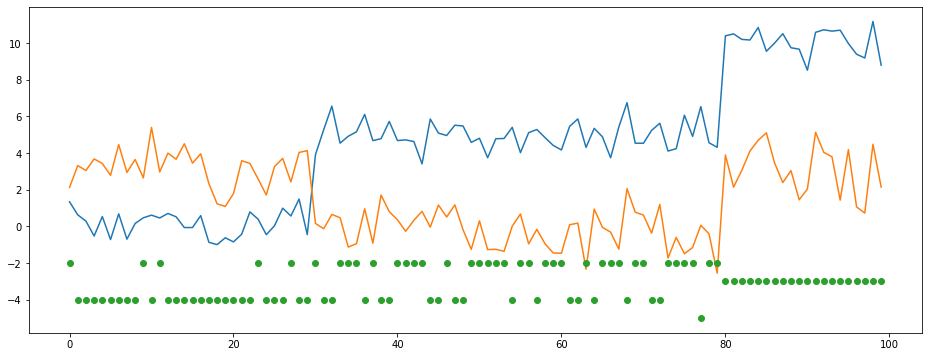

In [8]:
from sktime.transformations.series.hidalgo import Hidalgo

model = Hidalgo(K=3, burn_in=0.8, n_iter=100, seed=10)
fitted_model = model.fit(mv_mean)
z_mv_mean = fitted_model.transform(mv_mean)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(mv_mean)
ax.plot(z_mv_mean - 4, "o");

In [25]:
from sktime.transformations.series.dobin import DOBIN

ModuleNotFoundError: No module named 'sktime.transformations.series.dobin'

In [10]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sktime.annotation.stray import STRAY

# scaler = MinMaxScaler()
# X = scaler.fit_transform(mv_mean)
# model = STRAY()
# y_actual = model.fit_transform(X)

# fig, ax = plt.subplots(figsize=(16, 6))
# ax.plot(X)
# ax.plot(y_actual-4, 'o');

ModuleNotFoundError: No module named 'sktime.annotation.stray'

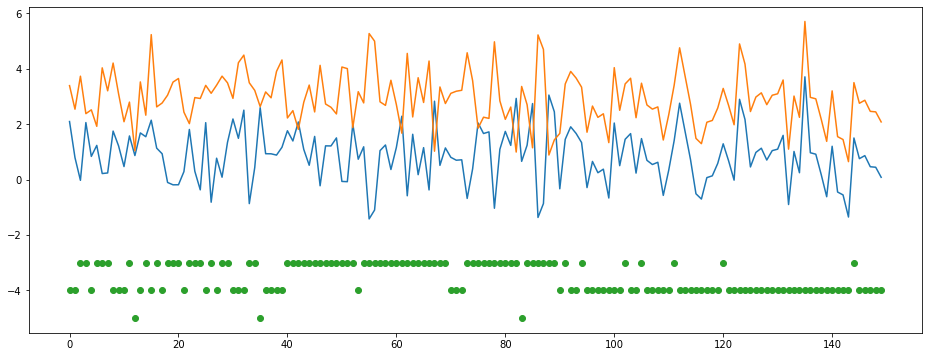

In [9]:
model = Hidalgo(K=2, burn_in=0.8, n_iter=1000, seed=148)
fitted_model = model.fit(mv_cov)
z_mv_cov = fitted_model.transform(mv_cov)

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(mv_cov)
ax.plot(z_mv_cov - 4, "o")

### HMM: Hidden Markov Model

...

In [ ]:
from sktime.annotation.hmm_learn import GMMHMM 

X = mv_mean[:, 0] - mv_mean[:, 1]
model = GMMHMM(n_components=3) 
model = model.fit(X) 
labels = model.predict(X) 

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(X)
ax.plot(labels - 4, "o");